# Title : Sentiment Analysis on Product Reviews Amazon

## Problem Statement

The goal of this project is to build a sentiment analysis model that
automatically classifies customer reviews on Amazon as **positive** or **negative**.
This helps understand whether customers are satisfied with the product based
on their written feedback.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
data = pd.read_csv('amazon.csv')

In [3]:
data.head()

,Text,label
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [4]:
data['Text'][0]

'This is  the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff'

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [69]:
data.isnull().sum()

Text     0
label    0
dtype: int64

In [70]:
data['label'].value_counts(normalize = True)

label
1    0.761652
0    0.238348
Name: proportion, dtype: float64

### Target Variable

- `label = 1` → Positive review  
- `label = 0` → Negative review

In [71]:
stop_words = stopwords.words('english')

def clean_text(text):

    text = text.lower()
    text = re.sub(r'[^a-z\s]' , ' ' , text)
    lammetizer = WordNetLemmatizer()
    words = word_tokenize(text)
    words = [lammetizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [72]:
data['clean_text'] = data['Text'].astype('str').apply(clean_text)

In [73]:
data[['Text' , 'clean_text']].head()

,Text,clean_text
0,This is the best apps acording to a bunch of ...,best apps acording bunch people agree bomb egg...
1,This is a pretty good version of the game for ...,pretty good version game free lot different le...
2,this is a really . there are a bunch of levels...,really bunch level find golden egg super fun
3,"This is a silly game and can be frustrating, b...",silly game frustrating lot fun definitely reco...
4,This is a terrific game on any pad. Hrs of fun...,terrific game pad hr fun grandkids love great ...


In [132]:
X = data['clean_text']
y = data['label']

In [133]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42 , stratify=y)

In [134]:
tfidf = TfidfVectorizer(max_features=10000 , ngram_range=(1,2))
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# Model Training

In [138]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vec , y_train)

y_lr_pre = lr.predict(X_test_vec)

print("Classification Report For Logistring Regression : ")
print(classification_report(y_test , y_lr_pre))

Classification Report For Logistring Regression : 
              precision    recall  f1-score   support

           0       0.87      0.62      0.72       953
           1       0.89      0.97      0.93      3047

    accuracy                           0.89      4000
   macro avg       0.88      0.79      0.83      4000
weighted avg       0.89      0.89      0.88      4000



In [146]:
mnb = MultinomialNB()
mnb = mnb.fit(X_train_vec.toarray() , y_train)

y_mnb_pre = mnb.predict(X_test_vec.toarray())

print("Classification Report for NaiveBayse : ")
print(classification_report(y_test , y_mnb_pre))

Classification Report for NaiveBayse : 
              precision    recall  f1-score   support

           0       0.91      0.46      0.61       953
           1       0.85      0.99      0.92      3047

    accuracy                           0.86      4000
   macro avg       0.88      0.72      0.76      4000
weighted avg       0.87      0.86      0.84      4000



Logistic Regression outperformed Naive Bayes with:
- Accuracy ≈ 89%
- F1-score for positive class ≈ 0.93
- Much better balance between precision and recall for both classes

Therefore, Logistic Regression with TF-IDF features was selected as the final model.


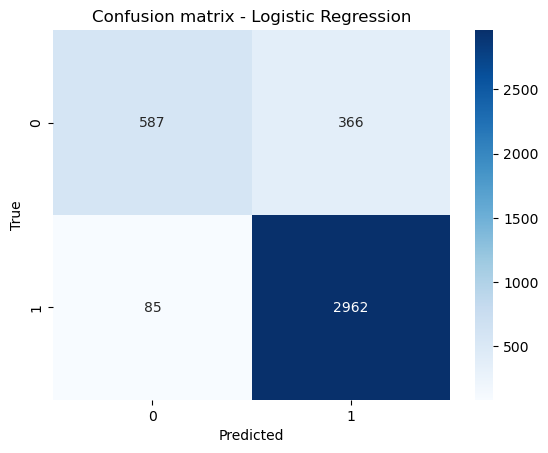

In [149]:
cm = confusion_matrix(y_test , y_lr_pre)

sns.heatmap(cm , annot = True , fmt = 'd' , cmap='Blues' , 
            xticklabels=[0,1] , yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix - Logistic Regression")
plt.show()

In [152]:
import joblib

joblib.dump(lr , 'log_reg_model.pkl')
joblib.dump(tfidf , 'tfidf_vectorizer.pkl')

['log_reg_model.pkl']